In [1]:
import pandas as pd
import numpy as np

In [2]:
income = pd.read_csv('C://Users//sharv//Projects//DATA//income.csv')

In [3]:
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
#Data transformation
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1), #Making salsat string into easier data
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"] #Predicting target (sal_Stat)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = income_model_prep(income)

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train[["age", "hoursperweek"]], y_train)

In [7]:
print(f"Train Accuracy:{lr.score(X_train[['age', 'hoursperweek']], y_train)}")
print(f"Test Accuracy:{lr.score(X_test[['age', 'hoursperweek']], y_test)}")

Train Accuracy:0.7533812837151121
Test Accuracy:0.7570356472795498


In [8]:
from sklearn.metrics import classification_report, accuracy_score

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test[['age', 'hoursperweek']]))

array([[4687,  194],
       [1360,  155]], dtype=int64)

In [10]:
print(classification_report(y_test,lr.predict(X_test[['age', 'hoursperweek']])))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4881
           1       0.44      0.10      0.17      1515

    accuracy                           0.76      6396
   macro avg       0.61      0.53      0.51      6396
weighted avg       0.70      0.76      0.69      6396



In [11]:
#lot of false negatives 
#less no of true positives
#tune the model - to push FN -> TP

In [12]:
import seaborn as sns

<Axes: xlabel='age'>

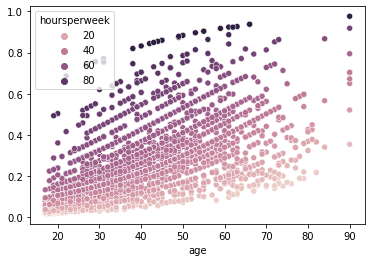

In [13]:
sns.scatterplot(
   x = X_test['age'],
   y = lr.predict_proba(X_test[['age', 'hoursperweek']])[:,1],
   hue = X_test['hoursperweek']
)

In [14]:
#No.1 way to increase accuracy

In [15]:
#Regularization 
logreg = LogisticRegression(max_iter=5000)
#default value for max iteration is 100
lr = logreg.fit(X_train, y_train)

In [16]:
print(f"Train Accuracy:{lr.score(X_train, y_train)}")
print(f"Test Accuracy:{lr.score(X_test, y_test)}")

Train Accuracy:0.8495817371589399
Test Accuracy:0.8566291432145091


In [17]:
#Accuracy increase

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [22]:
# from sklearn.model_selection import GridSearchCV

# # help(GridSearchCV)

# parameters = {
#     "C" : np.linspace(.1,2,20),
#     "penalty":["l1","l2", "elasticnet"],
#     "l1_ratio": np.linspace(0,1,11)
# }

# gridsarch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)
# gridsarch.fit(X_train_std, y_train)
# gridsarch.best_params_

In [20]:
logreg = LogisticRegression(C=.1, penalty="l2", solver="saga" ,max_iter=1000)
logreg.fit(X_train_std, y_train)


print(f"Train Accuracy:{lr.score(X_train_std, y_train)}")
print(f"Test Accuracy:{lr.score(X_test_std, y_test)}")

Train Accuracy:0.8081072629192401
Test Accuracy:0.806910569105691


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sharv\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
print(classification_report(y_test, logreg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4881
           1       0.74      0.61      0.67      1515

    accuracy                           0.86      6396
   macro avg       0.81      0.77      0.79      6396
weighted avg       0.85      0.86      0.85      6396



In [ ]:
# Soft Classification